##PPGC - UFPEL
##2024/1 - 1110076 - 1 - TÓPICOS ESPECIAIS EM COMPUTAÇÃO IV - MINERAÇÃO DE DADOS EDUCACIONAIS

##Guilherme D. Lima - Mestrando em Computação

##1) Qual tipo de problema você deve resolver?

##Esse exercício de programação foi dado pelo professor Ryan Baker no MOOC Big Data in Education, disponibilizado pela plataforma http://edx.org, como Assignment Week 7.

##Nesse exercício, ele disponibiliza uma base de dados simulada, que contém 6 features e 605 registros. O arquivo que contém a base de dados foi disponibilizado no e-aula e se chama “aula21.csv”.

##Nesse exercício, você deve usar a base de dados e algoritmo de clustering para responder às perguntas abaixo. Todas as explicações solicitadas devem ser providas como texto no notebook.

##Bibliotecas

In [55]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

##Importando os dados

In [56]:
df = pd.read_csv('aula21.csv', delimiter=',')

In [57]:
df.head()

,a,b,c,d,e,f
0,85,379,614,190,854,92
1,116,175,514,665,2,111
2,155,802,887,545,392,77
3,124,395,323,734,956,146
4,100,415,35,139,337,91


##2) Usando K-means

###2.1) Realize a clusterização utilizando k-Means++ com K=2. Observe os centros dos clusters. Quais 2 atributos têm a maior diferença entre o cluster 0 e o cluster 1? Esses 2 atributos serão usados nas próximas questões. Compartilhe os seus resultados (apenas as features) no fórum e verifique se os colegas acharam os mesmos resultados.

In [58]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [59]:
centers = kmeans.cluster_centers_

centers_df = pd.DataFrame(centers, columns=df.columns)

In [60]:
# Calcular a diferença entre os centros dos clusters
differences = np.abs(centers_df.loc[0] - centers_df.loc[1])

print("\nDiferenças entre os centros dos clusters:")
print(differences)


Diferenças entre os centros dos clusters:
a    511.142872
b      2.029285
c     31.730515
d     44.482629
e     18.461145
f    351.462455
dtype: float64


In [61]:
# Encontrar os dois atributos com a maior diferença
top_2_attributes = differences.nlargest(2).index

print("Atributos com a maior diferença:")
print(top_2_attributes)

Atributos com a maior diferença:
Index(['a', 'f'], dtype='object')


#####Resposta: Featues encontradas **A** e **F**

###2.2) É hora de plotar os dados. Defina o eixo X como a primeira resposta da questão 2.1 e defina o eixo Y como a segunda resposta da questão 2.1. Em seguida, defina a coluna de cores para refletir os números dos clusters (usar a variável colors a seguir que será útil para as próximas questões: colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown"]). Existem sete grupos principais ("caroços") neste conjunto de dados. Quantos deles são vermelhos e quantos são azuis? Observe que essa é uma outra maneira da gente plotar os dados, selecionando apenas as duas features mais importantes.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


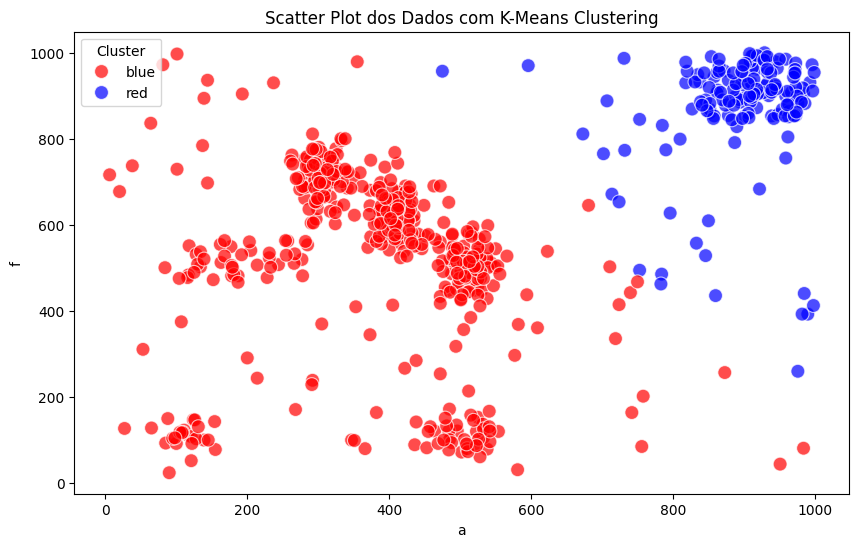

Contagem de caroços vermelhos e azuis:
color
blue    455
red     151
Name: count, dtype: int64


In [62]:
df_copy = df.copy()

df_copy['cluster'] = kmeans.fit_predict(df)

# Definir os atributos para plotagem
x_attribute = 'a'
y_attribute = 'f'

# Adicionar coluna de cores para os clusters
colors = ["red", "blue"]
df_copy['color'] = df_copy['cluster'].map(lambda x: colors[x])

# Plotar os dados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_copy[x_attribute], y=df_copy[y_attribute], hue=df_copy['color'], palette=colors, s=100, alpha=0.7)

# Configurar títulos e labels
plt.title('Scatter Plot dos Dados com K-Means Clustering')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.legend(title='Cluster', loc='best')

# Mostrar o gráfico
plt.show()

# Contar a quantidade de caroços vermelhos e azuis
color_counts = df_copy['color'].value_counts()
print("Contagem de caroços vermelhos e azuis:")
print(color_counts)

####Resposta:

Azul: 455

Vermelho: 151

###2.3) Agora, execute o k-Means++ novamente com k=7. O k-Means encontrou os 7 "caroços" nos dados que você viu anteriormente? Comente sua resposta.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


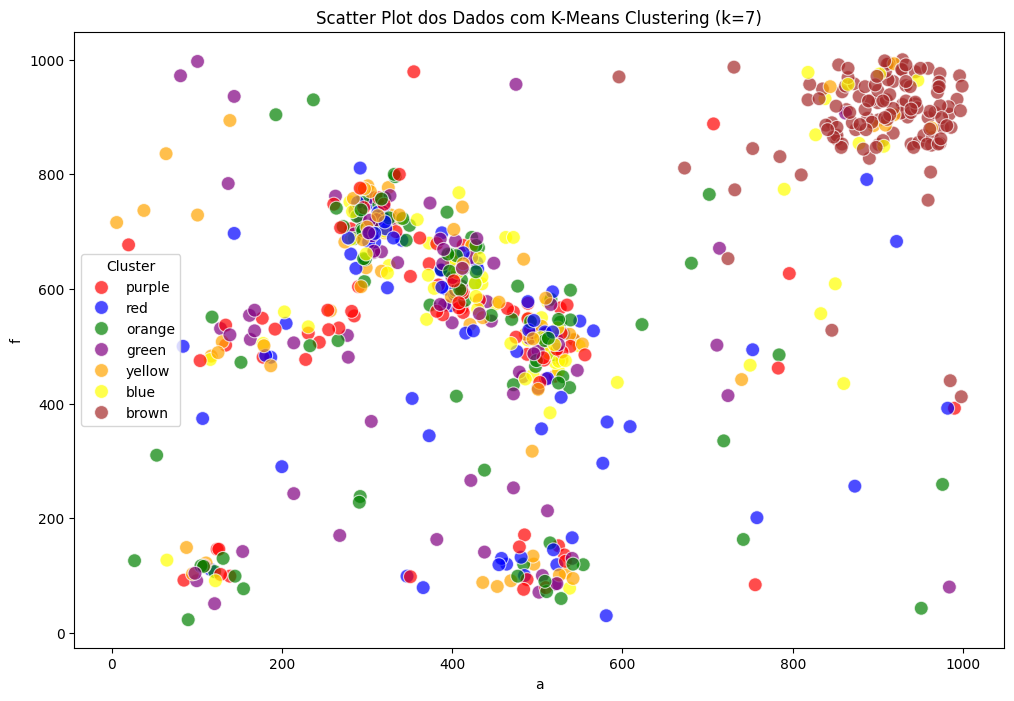

Contagem de pontos por cluster:
cluster
6    119
4     96
2     87
3     85
0     79
5     72
1     68
Name: count, dtype: int64


In [63]:
df_copy = df.copy()

kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
df_copy['cluster'] = kmeans.fit_predict(df)

# Definir os atributos para plotagem
x_attribute = 'a'
y_attribute = 'f'

# Adicionar coluna de cores para os clusters
colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown"]
df_copy['color'] = df_copy['cluster'].map(lambda x: colors[x])

# Plotar os dados
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_copy[x_attribute], y=df_copy[y_attribute], hue=df_copy['color'], palette=colors, s=100, alpha=0.7)

# Configurar títulos e labels
plt.title('Scatter Plot dos Dados com K-Means Clustering (k=7)')
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.legend(title='Cluster', loc='best')

# Mostrar o gráfico
plt.show()

# Contar a quantidade de pontos em cada cluster
cluster_counts = df_copy['cluster'].value_counts()
print("Contagem de pontos por cluster:")
print(cluster_counts)

####Resposta:

Visivelmente, está ocorrendo uma sobreposição entre os clusters, indicando que a falta de uma separação clara ao usar o K-means++ com k=7 sugere que pode ser necessário ajustar o número de clusters utilizado.

###2.4) Plote o gráfico bidimensional para cada par possível de variável: feature_pairs = [("a", "b"), ("a", "c"), ("a", "d"), ("a","e"), ("a", "f"), ("b", "c"), ("b", "d"), ("b", "e"), ("b", "f"), ("c", "d"), ("c", "e"), ("c", "f"),("d", "e"), ("d", "f"), ("e", "f")]

In [64]:
# Definir a lista de pares de variáveis para plotagem
feature_pairs = [("a", "b"), ("a", "c"), ("a", "d"), ("a", "e"), ("a", "f"),
                 ("b", "c"), ("b", "d"), ("b", "e"), ("b", "f"),
                 ("c", "d"), ("c", "e"), ("c", "f"),
                 ("d", "e"), ("d", "f"),
                 ("e", "f")]

# Definir as cores para os clusters
colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown"]

# Criar os gráficos
num_pairs = len(feature_pairs)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))  # Ajuste o número de linhas e colunas conforme necessário
axes = axes.flatten()  # Transformar o array 2D em 1D para fácil iteração

for i, (x_attr, y_attr) in enumerate(feature_pairs):
    sns.scatterplot(x=df_copy[x_attr], y=df_copy[y_attr], hue=df_copy['cluster'], palette=colors, ax=axes[i], s=100, alpha=0.7)
    axes[i].set_title(f'{x_attr} vs {y_attr}')
    axes[i].set_xlabel(x_attr)
    axes[i].set_ylabel(y_attr)
    axes[i].legend(title='Cluster', loc='best')

# Ajustar layout
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

####Resposta:

Apenas as variáveis
A e F mostram uma separação clara e uma definição robusta dos clusters. Esses atributos são altamente relevantes para a segmentação dos dados.

###2.5) Filtrar todas as variáveis exceto aquelas da questão 2.1, e reexecutar o k-Means++ usando apenas essas duas variáveis, com k=7. Todos os sete aglomerados de dados agora estão mais ou menos incorporados em sete clusters razoáveis? Explique sua resposta.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-65-0882566c3e6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = kmeans.fit_predict(df_filtered)
<ipython-input-65-0882566c3e6a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['color']

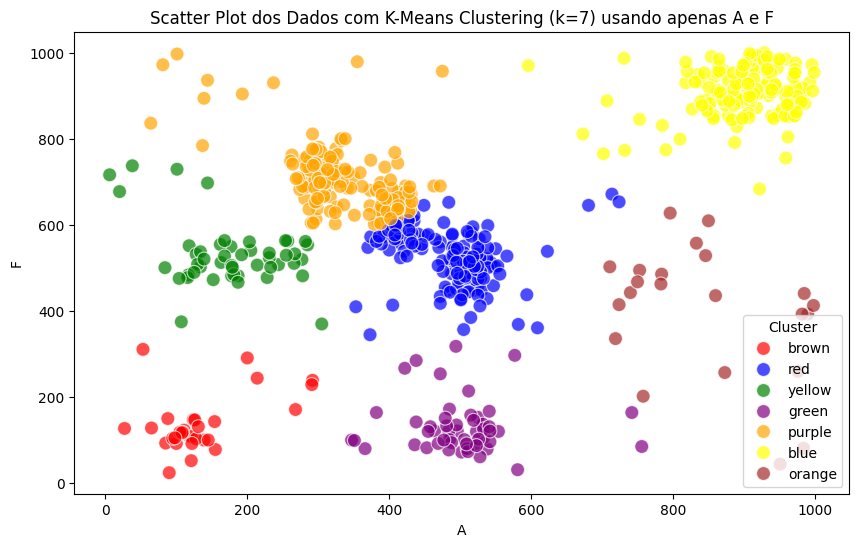

Contagem de pontos por cluster:
cluster
3    170
0    149
1    135
2     52
5     48
6     30
4     22
Name: count, dtype: int64


In [65]:
# Filtrar as variáveis 'A' e 'F'
df_filtered = df[['a', 'f']]

# Inicializar o modelo KMeans com k=7 e método k-means++
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)
df_filtered['cluster'] = kmeans.fit_predict(df_filtered)

# Definir as cores para os clusters
colors = ["red", "blue", "green", "purple", "orange", "yellow", "brown"]
df_filtered['color'] = df_filtered['cluster'].map(lambda x: colors[x])

# Plotar os dados filtrados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_filtered['a'], y=df_filtered['f'], hue=df_filtered['color'], palette=colors, s=100, alpha=0.7)

# Configurar títulos e labels
plt.title('Scatter Plot dos Dados com K-Means Clustering (k=7) usando apenas A e F')
plt.xlabel('A')
plt.ylabel('F')
plt.legend(title='Cluster', loc='best')

# Mostrar o gráfico
plt.show()

# Contar a quantidade de pontos em cada cluster
cluster_counts = df_filtered['cluster'].value_counts()
print("Contagem de pontos por cluster:")
print(cluster_counts)

####Resposta:

Os clusters estão agrupados razoavelmente, pois, ao visualizarmos o gráfico, é possível inferir que os clusters estão bem definidos e os dados parecem estar agrupados de forma lógica. Isso sugere que o número de clusters k=7 pode ser adequado para as duas variáveis selecionadas.

###2.6) Execute o método de cotovelo para achar um ou mais valores de k. Existe um único valor de k que poderia ser considerado o cotovelo ou mais de um? Execute o Kmeans++ para diferentes valores de k que você acha que poderia ser o cotovelo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

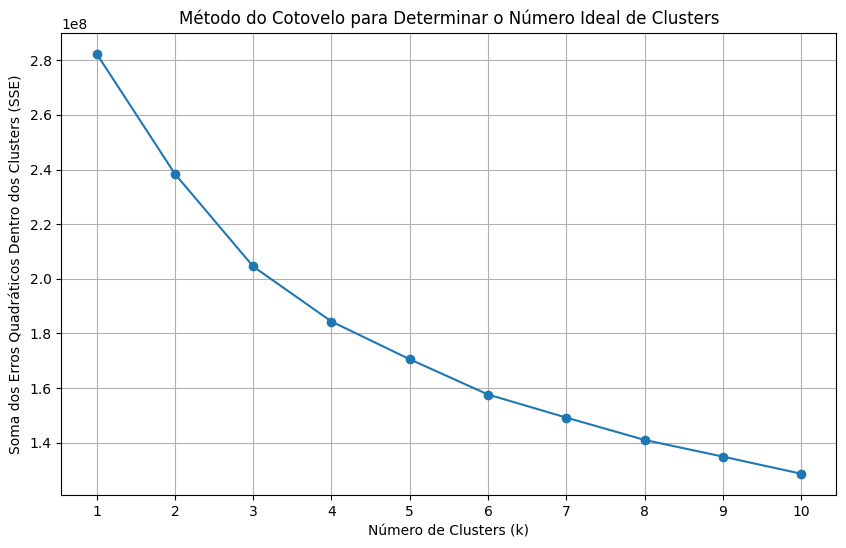

In [66]:
k_values = range(1, 11)
sse = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ideal de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadráticos Dentro dos Clusters (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

####Resposta:

Ao visualizarmos o gráfico, podemos avaliar que há múltiplos pontos de inflexão, implicando em múltiplos cotovelos.

##3) DBSCAN

###3.1) Execute o DBSCAN considerando todas as features. Teste diferentes valores de eps e min_samples. Qual o melhor valor de eps e min_samples?

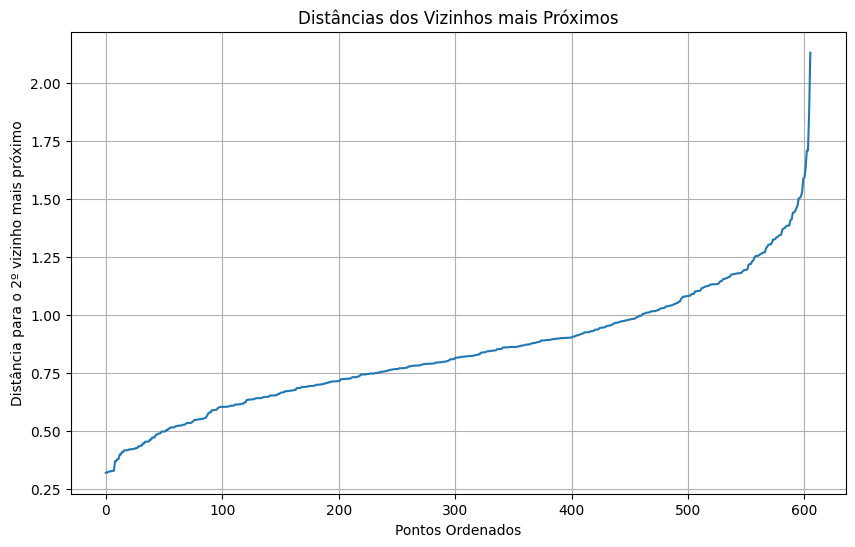

Melhor valor de eps: 2.0
Melhor valor de min_samples: 10
Melhor Score de Silhouette: 0.2279884341487275


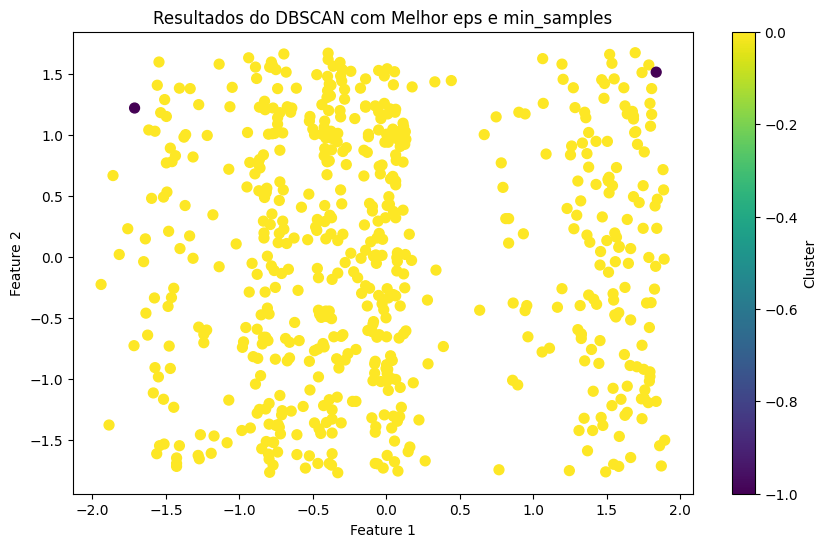

In [67]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:,1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distâncias dos Vizinhos mais Próximos')
plt.xlabel('Pontos Ordenados')
plt.ylabel('Distância para o 2º vizinho mais próximo')
plt.grid(True)
plt.show()

eps_values = np.arange(0.1, 2.1, 0.1)
min_samples_values = [5, 10, 20, 30, 40]

best_eps = None
best_min_samples = None
best_score = -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)

        if len(set(labels)) > 1:
            try:
                score = silhouette_score(df_scaled, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels
            except ValueError:
                continue

print(f"Melhor valor de eps: {best_eps}")
print(f"Melhor valor de min_samples: {best_min_samples}")
print(f"Melhor Score de Silhouette: {best_score}")

plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=best_labels, cmap='viridis', s=50)
plt.title('Resultados do DBSCAN com Melhor eps e min_samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

####Resposta:

Melhor valor de eps: 2.0

Melhor valor de min_samples: 10

Melhor Score de Silhouette: 0.2279884341487275

###3.2) Execute o DBSCAN considerando apenas as features achadas na questão 2.1. Plote o gráfico considerando apenas as features achadas na questão 2.1. Teste diferentes valores de eps e min_samples. Qual o melhor valor de eps e min_samples?

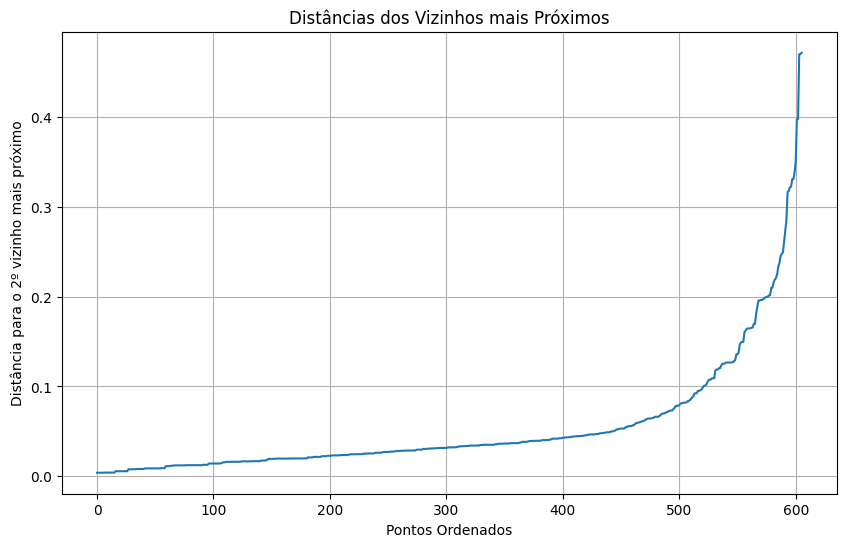

Melhor valor de eps: 0.5
Melhor valor de min_samples: 20
Melhor Score de Silhouette: 0.5776022361273657


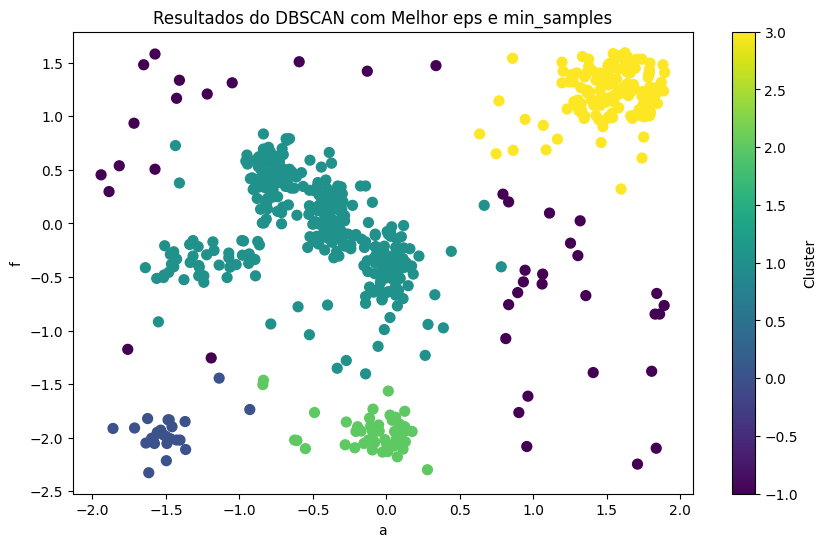

In [68]:
df_filtered = df[['a', 'f']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:,1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Distâncias dos Vizinhos mais Próximos')
plt.xlabel('Pontos Ordenados')
plt.ylabel('Distância para o 2º vizinho mais próximo')
plt.grid(True)
plt.show()

eps_values = np.arange(0.1, 2.1, 0.1)
min_samples_values = [5, 10, 20, 30, 40]

best_eps = None
best_min_samples = None
best_score = -1
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)

        if len(set(labels)) > 1:
            try:
                score = silhouette_score(df_scaled, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_labels = labels
            except ValueError:

                continue

print(f"Melhor valor de eps: {best_eps}")
print(f"Melhor valor de min_samples: {best_min_samples}")
print(f"Melhor Score de Silhouette: {best_score}")

plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=best_labels, cmap='viridis', s=50)
plt.title('Resultados do DBSCAN com Melhor eps e min_samples')
plt.xlabel('a')
plt.ylabel('f')
plt.colorbar(label='Cluster')
plt.show()

####Resposta:

Melhor valor de eps: 0.5

Melhor valor de min_samples: 20

Melhor Score de Silhouette: 0.5776022361273657

###3.3) Compare os dois gráficos (K-means e DB-SCAN). Você achou os mesmos clusters nos dois casos? O DBSCAN se mostrou diferente em algum dos casos? Qual? Explique.

####Resposta:

Os clusters encontrados foram diferentes, pois o K-means assume clusters esféricos e homogêneos, enquanto o DBSCAN pode encontrar clusters com formas mais complexas e identificar pontos que não pertencem a nenhum cluster.

###3.4) Para esse exemplo, o DBSCAN se mostrou melhor, pior ou igual que o K-means++? Explique sua resposta.

####Resposta:

O DBSCAN se mostrou melhor. Os clusters possuem formas complexas e, de acordo com o funcionamento descrito anteriormente, o DBSCAN conseguiu identificar clusters com formas e densidades variáveis que o K-means++ não conseguiu capturar.